# Lab 9: Reinforcement Learning
# Submitted By: Sarim Aeyzaz (i21-0328)

In [37]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import Image
import pickle

In [ ]:
# Learning notes:
    # Our goal is to make a Q table of 4 states (left down right up) x 63 possible board combinations
    
    # is_slippery means that if our dude goes down, there is still a chance to go left or right, 
    # just makes this problem interesting because you can't solve it with traditional pathfinders 
        
    # In the beginning, you just take random actions but later on, you should take actions
    # as suggested by the Q table. Use Epsilon-Greedy algorithm to do this
        
    # The performance of the algorithm is highly dependent on the results of the epsilon-greedy exploration. 
    # If we don't update the informative Q(s,a) table within some episodes (e.g. 5000), the results are terrible.

In [47]:
# Change this to either render or not
render = True
training = False
episodes = 1
slippery = False

# Environment
env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=slippery, render_mode='human' if render else None)

# Q table
if training:
    q = np.zeros((env.observation_space.n, env.action_space.n))
else:
    f = open('frozenlake-8x8.pkl', 'rb')
    q = pickle.load(f)
    f.close()
    
# Hyperparameters
learning_rate_a = 0.9
discount_factor_g = 0.9


# Epsilon-Greedy algorithm parameters
epsilon = 1 # 100% random actions
epsilon_decay_rate = 0.0001
rng = np.random.default_rng()


# For tracking progress purposes
rewards_per_episode = np.zeros(episodes) # This is to keep track of the training


for i in range(episodes):

    state = env.reset()[0] # Top left starting point :D 
    terminated = False # If the dude falls down in the hole
    truncated = False # If the dude just wanders around for too long

    
    while (not terminated and not truncated):
        
        # Take random action (will happen more often during the early episodes)
        if training and rng.random() < epsilon:
            action = env.action_space.sample() # 0 - left, 1 - down, 2 - right, 3 - up
        
        # Else, Take action as dictated by q table
        else:
            action = np.argmax(q[state,:])
        
        new_state, reward , terminated, truncated, _ = env.step(action)

        # Bellman equation
        if training:
            q[state,action] = q[state,action] + learning_rate_a * (
                reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
            )

        state = new_state
    
    epsilon = max(epsilon - epsilon_decay_rate, 0) # decays per episode
    
    if (epsilon == 0):
        learning_rate_a = 0.0001
        
    if reward == 1:
        rewards_per_episode[i] = 1
    
env.close()

if not render:
    sum_rewards = np.zeros(episodes)
    for j in range(episodes):
        sum_rewards[j] = np.sum(rewards_per_episode[max(0,j-100):j+1]) # running sum for every 100 episodes
    plt.plot(sum_rewards)
    plt.savefig("frozenlake-sarim-8x8.png")
    plt.show()

if training:
    f = open('frozenlake-8x8.pkl', 'wb')
    pickle.dump(q, f)
    f.close()

Is_slippery = False, Episodes = 15000


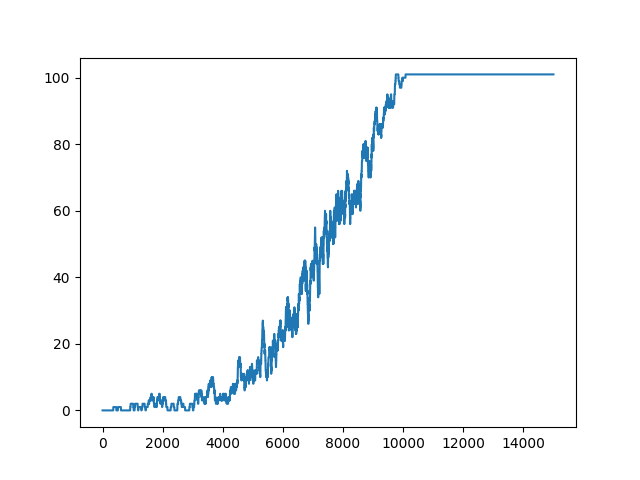

In [44]:
print(f"Is_slippery = {slippery}, Episodes = {episodes}")
Image(filename="frozenlake-sarim-8x8.png") 

Is_slippery = True, Episodes = 15000


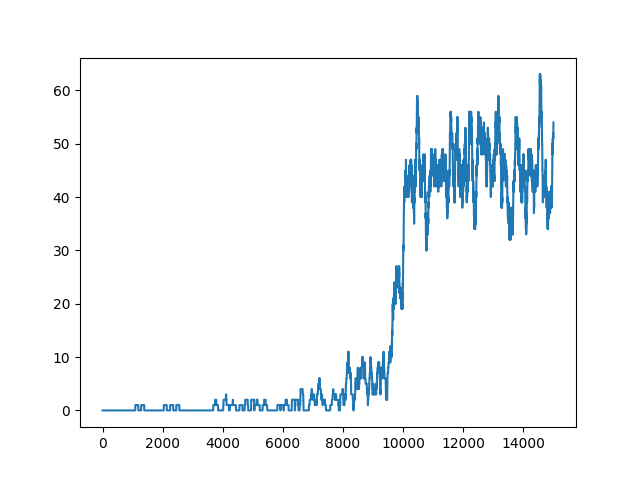

In [38]:
print(f"Is_slippery = {slippery}, Episodes = {episodes}")
Image(filename="frozenlake-sarim-8x8.png") 